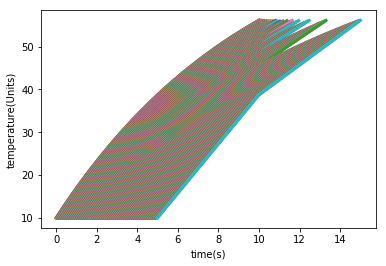

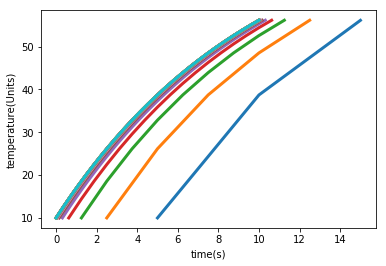

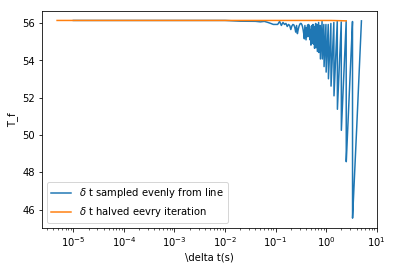

In [4]:
# challenge problem 2.2

import numpy as np
from matplotlib import pyplot
import math



T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 10. # maximum time



T1 = []

dT1 = []
dT2 = []
dt3 = []


# choosing \delta t from equally spaced line
t = np.linspace(0.00001,5,500)

for i in range(0,len(t)):
    dt = t[i]
    nsteps = int(tmax/dt)
    dt1 = []
    dt1.append(dt)
    T = []
    T.append(T0)
    for j in range(0,nsteps):
        y = T[-1]
        y1 = -r*(y-Ts)
        k1 = dt*y1
        y2 = -r*(y+(k1/2)-Ts)
        k2 = dt*y2
        y3 = -r*(y+(k2/2)-Ts)
        k3 = dt*y3
        y4 = -r*(y+k3-Ts)
        k4 = dt*y4
        T_new = T[-1]+ (k1 + 2*k2 + 2*k3 + k4)/6
        T.append(T_new)
        dt1.append(dt1[-1]+dt)
    pyplot.plot(dt1, T, ls='-', lw=3)
    T1.append(T_new)
pyplot.xlabel('time(s)')
pyplot.ylabel('temperature(Units)')
pyplot.show()


# choosing \delta t by halving at each step
T2 = []
dt = tmax/2
dt_alt = []

for i in range(0,20):
    nsteps = int(tmax/dt)
    T_list = []
    dt2 = []
    dt2.append(dt)
    T_list.append(T0)
    for j in range(0,nsteps):
        y = T_list[-1]
        y1 = -r*(y-Ts)
        k1 = dt*y1
        y2 = -r*(y+(k1/2)-Ts)
        k2 = dt*y2
        y3 = -r*(y+(k2/2)-Ts)
        k3 = dt*y3
        y4 = -r*(y+k3-Ts)
        k4 = dt*y4
        T_new = T_list[-1]+ (k1 + 2*k2 + 2*k3 + k4)/6
        T_list.append(T_new)
        dt2.append(dt2[-1]+dt)
    pyplot.plot(dt2, T_list, ls='-', lw=3)
    T2.append(T_new)
    dt = dt/2
    dt_alt.append(dt)
pyplot.xlabel('time(s)')
pyplot.ylabel('temperature(Units)')
pyplot.show()

    
pyplot.semilogx(t, T1, ls='-',label='$\delta$ t sampled evenly from line')
pyplot.semilogx(dt_alt, T2, ls='-',label='$\delta$ t halved eevry iteration')
pyplot.xlabel('\delta t(s)')
pyplot.ylabel('T_f')
pyplot.legend()
pyplot.show()        







It can be clearly seen that Runge-Kutta method yields very uniform Final Temperature, on semilog scale, for the case when \delta t is halved in every iteration. Whereas when \delta t is uniformly sampled from a range, the final temperature remains uniform for a relatively small range of \delt at.